<a href="https://colab.research.google.com/github/EAName/yelp-reviews/blob/main/Create_User_and_Review_CSV_Version_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import os

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import statistics
import numpy as np

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df =pd.read_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_user_version2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,Unnamed: 0,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars
0,0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",7217,1259,5994,267,2007,3.91
1,5,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",43091,13066,27281,3138,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3.74
2,26,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",2086,1010,1003,52,"2009,2010,2011,2012,2013",3.32
3,35,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",512,330,299,28,"2009,2010,2011",4.27
4,38,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",29,15,7,1,NaN,3.54


In [5]:
df = df.iloc[:,1:]

In [82]:
df.shape

(1249206, 11)

In [7]:
df.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",7217,1259,5994,267,2007,3.91
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",43091,13066,27281,3138,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3.74
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",2086,1010,1003,52,"2009,2010,2011,2012,2013",3.32
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",512,330,299,28,"2009,2010,2011",4.27
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",29,15,7,1,NaN,3.54


In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [8]:
df.describe()

,review_count,useful,funny,cool,fans,average_stars
count,1.249206e+06,1.249206e+06,1.249206e+06,1.249206e+06,1.249206e+06,1.249206e+06
mean,3.007106e+01,5.628995e+01,2.299898e+01,3.277324e+01,1.965375e+00,3.717665e+00
std,9.790677e+01,7.825248e+02,4.982574e+02,6.899764e+02,2.227070e+01,1.046232e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.170000e+00
50%,8.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.920000e+00
75%,2.200000e+01,1.700000e+01,3.000000e+00,4.000000e+00,0.000000e+00,4.500000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00


###Analyze Outliers

In [55]:
# Number of users who gave all 1 star reviews
df2  = df.loc[df['average_stars'] == 1]
df2.shape

(61560, 11)

(0.0, 100.0)

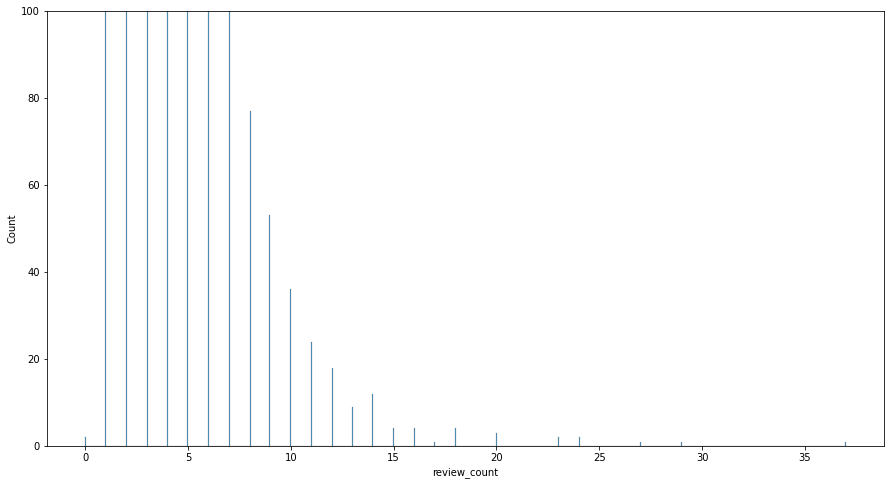

In [57]:
# Distribution of review count of users giving all 1 star reviews
plt.figure(figsize=(15,8))

sns.histplot(data=df2, x="review_count")
plt.ylim(0, 100)

In [16]:
# Number of users who gave more than one 1 star reviews
df3  = df2.loc[df2['review_count'] > 1]
df3.shape

(18095, 11)

18095 users had 2 or more reviews of all 1 stars

In [17]:
# Number of users who gave more than ten 1 star reviews
df4  = df2.loc[df2['review_count'] > 9]
df4.shape

(122, 11)

122 users had 10 or more reviews of all 1 stars

In [76]:
# Number of users who gave more than 15 1 star reviews
df4  = df2.loc[df2['review_count'] > 14]
df4.shape

(23, 11)

23 users had 15 or more reviews of all 1 stars

In [19]:
# Number of users who gave more than 20 1 star reviews
df5  = df2.loc[df2['review_count'] > 19]
df5.shape

(10, 11)

10 users had 20 or more reviews of all 1 stars

### Analze the users and reviews of users giving more than 15 all 1 star reviews

In [69]:
df4

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars
61385,zb723R2g4erHBoPh8t5I-w,Joji,16,2014-07-05 15:00:35,"MyzAMOiyWNFq5lOGvQlgmg, KGHowAOBX1WBKNthhMhmIg, hIfSluzGaIUK70A2HlQk8A, IeJ4L8pDZOX7o10vZb0wPg, LXwSY77H5hxdRtgcUhxPTg, 3YNwfadhDyVZNQod3tl9OA, skro-OhYJuCZmHThxLCX7A, 0xp-Zqpo6ehmIi-c7D9z2w, -F2tjL1U4yf8vi8Yw1Ho6Q, bbVldLpjHLMphXY6pDA7Gw, O5cwGRl4uGNGbPXSWwQoHQ, r-PmaG-7VTQMmPjjfRb8zg, LyDMmxfY9nK_KzKYiqHicg, YSM83KAfbx_NPUER2sf0Qg, 5jPZO4ZdytoEdKwaP5_YqA, H1fypDeHbo_LxmhPdsAOFg, Yy6fw2uoJhi2lEP1-pXsXg, YNGdnPZzEetSjkDg_MF_BA, ldmTNsyrEhVB5kVTv1trFQ, 3tEmt2EMz6e97-JLMQEEaw, ZsJJJjzwARm4IrEwu8utWQ, vyAQtarOHdQ0dBxfeARyLQ, VrMcdT7pyRgfC_ubgZk8pQ, 0sW4NfwI5Ze330QWi6weGQ, Al34d7KjdZF7zefq0u2L3A, I-8haEwrb5ULNQw7TpBERg",18,3,1,0,NaN,1.0
115578,G2yoB8gAhLvqn-peUIt9wg,Roger,15,2013-03-28 01:13:26,"SivMa90hGsg6ZNk2tp-ApQ, 1KONe9sOboyLtpQsFK2gkg",21,2,0,0,NaN,1.0
212526,WIXjC9wsN-WPtNz5Ua4k8g,B,17,2013-09-26 14:11:21,"Glongznl6yL_IPe2LoUTCw, dORa4kMQZOrsdlsSngkN6A, Vjd-BW3FZCeznzB_W_wPzg, wvjcV9VNQ6nV0-fXcGyiAQ, ZlaG9eXSARtri8522zjOEw, 6Z4-I-xJmyhX9tY37UGL4A, LnaKBAJMSfvZ4a_AV1mxTg, z8KwPEuVRaF965IvlJCagw, EC18MHKxeEFWX7-UL14Gbw",35,6,0,0,NaN,1.0
225881,1KRXBGbrzW5pog_NReJn7A,Yo,16,2014-11-03 16:24:47,"B_fQ_qlf52uY3bJgeVQx5Q, XFFKhZFQDMFjCmNsksQ6MQ, TsSQZaJGyteHlobjho8jsw, EUb4_hZeLZNDju-xzl0fSw, 4KoyhOnWaWGPHjTCdmH7yw, 6ttFauIf-j4s4gvLsCrWMA, HUCRGyzGjqVRXAHV2t7fhg, RByQ4TPrHDeb8TMUlm6KtA, 7g-msbhTii_fq2BKGLcW_g, -1j3o0QQSbd8oqaCfpUgNg, nDJgBrK6pLG3jj_PYcYzDA, I1Kt2becJmO0OaHvmSFN9Q, V-RDJpgh9WjpQOHCz-VBCw, MCFH1rbIXlIZcz-w9RfXow, W-NRWNCO9X6eJc6GkXXFUQ, wpln3QytDGTt9ApQTLNvXg, 0FWGCY8NNfTd7ZMA84zrpw, yv7Cot7KkQ1-mNSvL4YAJg, 9e8SDnf_oINkz-EjgcvXXQ, uGUDcfTNLti1HNI-syDrmQ, tPEXJV7AEM5gP1g8Snre7Q, bYizoqna1c1ugYnuU9yn9Q, w5cxwB3QSju60yyBT4vxzw, 91xN8UDH0LXOB7SPazEYvg, cSPXUa1fIGwLTEoJt6ngug, g5GGAn87z7ZuUgbkRN6hhw, Up1Xx6ucf1DyRe7RTx8Ntg, EPVdYm5R1mzrAtmDeyM2Gw, VysYlNfm41PEaF2T4FQA0A, rDEpBH-1g6pcvCjwhFRBnA, mmUuneQeHldRx_O2CBFkVQ, 6U9i7H8RgZYvl7cQBceghQ, JstLo8g345jCgRLWSvMEPg, _ygNxjBolUDuULY-l2vzFA, g_wNx9BQuZtCR5oT7BoMBw, VVLFoKfbxYeABG-1Ndbb9A, jvnOySGL86ZjQH90_f-0PA, EDO7_fdwHyLOmhddcSyQeg, 0ffmps8ibTc_vCcA61d_UQ, -0cW2pn_1zIx9AK1pG7sSw, PS-vi-viWc2Gbs5qdA2_Jg, ev6hfUbSb3JLSapkllphQg, 9L4jPa7U2eai3b_tBINwRQ, 4BF3nDgxwRIkPJKp_MuMZQ",7,4,1,0,NaN,1.0
251749,G1UKXCkD-vy0wo1Y9kos-w,Vasek,23,2014-07-26 18:58:29,qGoBFXDAapUBWg8avEAtGQ,25,20,7,0,NaN,1.0
266669,Xud02dqMxwjsJBMPe-X1Vg,C,27,2013-03-13 03:24:08,None,2,0,0,0,NaN,1.0
272102,NZiJo1q2O-4h450XfFoKhw,Phil,24,2020-07-13 14:21:46,None,19,12,4,0,NaN,1.0
273609,K41f1lyWGzvkAqSkU4S7CQ,Allen,15,2016-01-19 13:55:05,None,9,3,1,0,NaN,1.0
291777,M3XabyWxRehEkSOFTEDvZQ,Steve,15,2017-04-29 12:29:33,ktlSFWeyqAKHw1I2sAeiMQ,17,4,0,0,NaN,1.0
292277,W6tpWh0pQdhzatNpt4bX2A,Akeem,15,2018-06-23 21:28:10,None,8,7,0,0,NaN,1.0


In [77]:
Total = df4['review_count'].sum()
print(Total)

460


In [78]:
df4.shape

(23, 11)

In [79]:
# list of users who gave more than 15 all 1 star reviews
users = df4['user_id'].tolist()

In [89]:
df_r =pd.read_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_reviews_version2.csv')

In [90]:
df_r.shape

(3700356, 5)

In [80]:
# reviews of users giving all 1 star reviews
df6 = df_r.loc[df_r['user_id'].isin(users)]
df6.shape

(63, 5)

There are 23 users leaving a combined 460 1 star reviews. However, there are only 63 text reviews.

In [64]:
df6

,user_id,business_id,date,stars,text
45397,HERTMvQu6ronMy4kx3pS_w,FnEkr6LzjuGsg93Z7fkl7Q,2018-03-09 14:18:39,1.0,This place is super unprofessional and its clientele is racing. I had a psycho literally scream at me at the restaurant. I made an announcement as to the rudeness. The supervisor intervened and took me outside and told me not to return and made up a lie about owing the restaurant 78 dollars. He hoarded the restaurant. It is a racist pit hole. As you walk in the black hostess is in the corner and they are all at the bar having a good time. He took the psycho's side in a minute like if I did anything wrong...it is the usual theme despite everything else being allowed in this country. \n\nSad to say another racist pit hole....full of shit and rudeness.
231349,1KRXBGbrzW5pog_NReJn7A,0pL-eq0ufX5jMDgVAvoHHw,2017-06-12 01:01:55,1.0,"These people don't honor their hours, I stopped by at 9:35pm on Sunday , and I was told they actually close at 9:45, even it says 9:00pm on the door. Then I told the guy it's 9:35 on my cell, and he said their clock is hoeing different time, make no sense , WTF"
239701,K41f1lyWGzvkAqSkU4S7CQ,sway6xsRT_CUC6peK_Pyww,2018-12-16 16:39:07,1.0,"What a horrible experience on the roof top bar. Bar service sucks. 35 min to get a drink while the staff run around in circles. Worst efficiency I've ever seen while the managers did nothing. When I if he was the manager is said ""sort of"" After telling him our experience is responded ""OK"". \n\nNever go to this place. It sucks."
258440,G2yoB8gAhLvqn-peUIt9wg,PxEiXqMAzzvp8GFlb5EoLg,2017-09-26 00:35:28,1.0,"I took two guests there for dinner. I ordered the appetizer sampler, which was supposed to be andouille sausage, Cajun shrimp, pimento cheese, fried pickles, fried green tomatoes,and homemade almond crackers. They brought it to the table, and left it without saying a word. It did not have either the cheese or the fried green tomatoes. \n\nWhen I let them know they forgot the cheese and tomatoes, they checked with the kitchen, came back to our table and said that the reason it did not come with the cheese and tomatoes was that the ran out. Period. I asked how you could advertise that it came with these things (for a $19 appetizer,) take our order without mentioning that you don't actually have the things I ordered, or at the very least once the kitchen realizes that they do not have the food come back to our table and ask if we wanted to order something else, or would like to substitute something for the missing items?\n\nThe manager then came over and added more shrimp and sausage to make up for the missing items (the ""homemade almond crackers"" had already been substituted with cut up pieces of plain toast, which they made no mention of.) \n\nI then asked the waiter about their ""Hot Chicken,"" to make sure that I could get it grilled, as I cannot eat fried chicken, to which he said yes you can get it pan seared. Of course they brought me fried chicken! I sent it back, and refused their offer to bring me something else. \n\nThe atmosphere was nice and so were the people, but they tried to rip us off with the appetizer, and made the wrong food. After taking my guests out for dinner - I had to stop and get take out on the way home! Dishonest and incompetent service - never again!"
286405,zb723R2g4erHBoPh8t5I-w,09za1h1fdeF9rTSviTV3zg,2014-07-05 15:04:09,1.0,"This WAS a great place to eat ; the buffet and the regular food was superb, I used to go here with my colleagues from work almost twice a week regularly. \nThe cook apparently changed a few weeks ago and so did the manager, and it has not been the same after.\n I love Indian food and I eat it all the time. I have not visited this place for two months, since the change. Sadly the prices have gone up and the quality and gone down.\n To add insult to injury they have a new blonde manager who barely knows Indian food, but is loud and uncouth in her interactions.\nNothing against her, just that a Indian mana

Remove the 63 reviews and 23 users giving only 1 star reviews and more than 15 1 star reviews

In [83]:
df_u = df.loc[~df['user_id'].isin(users)]

In [84]:
df_u.shape

(1249183, 11)

In [97]:
df_u.to_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_user_version3.csv', index = False)

In [92]:
df_r = df_r.loc[~df_r['user_id'].isin(users)]

In [93]:
df_r.shape

(3700293, 5)

In [95]:
df_r.to_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_reviews_version3.csv', index = False)